In [329]:
import pandas as pd
import string
import numpy as np
import re
import random
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [366]:
review_df = pd.read_csv("reviews.csv", sep = ",")

In [367]:
review_df.head()

,review,category
0,sangat baik kurang jadwal uji masuk dalam apli...,2
1,untuk widget nya di buat dark theme juga dong,2
2,update min klo bisa dibikib kaya sosmed khusus...,3
3,untuk developer moga depan bisa disetting untu...,2
4,okee lah,1


###### Category usability :

* 1: Effectivenes.
* 2: Efficiency.
* 3: Satisfaction.
* 4: Error.
* 5: Learnability.
* 6: Memorability.
* 7: Cognitive Load.


In [368]:
review_df['category'].value_counts()

1    109
2     56
3     51
4     45
5     35
6     19
7     15
Name: category, dtype: int64

In [369]:
review_df = review_df[review_df['category']<4]

In [370]:
review_df['category'].value_counts()

1    109
2     56
3     51
Name: category, dtype: int64

In [371]:
# Gunakan library Sastrawi untuk stopword bahasa indonesia
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z #+_]')
sastrawi = StopWordRemoverFactory()
stopworda = sastrawi.get_stop_words()
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def clean_text(text):
    text = text.lower()
    text = clean_spcl.sub(' ', text)
    text = clean_symbol.sub('', text)
    text = stemmer.stem(text)
    text = ' '.join(word for word in text.split() if word not in stopworda)
    return text

In [372]:
review_df['review'] = review_df['review'].apply(clean_text)

In [373]:
review_df.tail(20)

,review,category
304,sangat bantu,1
305,good feature and simple to use hope the applic...,1
306,tambah fitur log out,2
307,sangat bantu mahasiswa the best tingkat terus,2
309,gabisa zoom scan maju depan sama aja boong,3
310,mau ga mau instal apl presensi,3
311,kalau sekali tambah fitur buat lihat jadwal kelas,2
312,good,1
313,mantul,1
314,bagus,1


In [374]:
review_df.shape

(216, 2)

In [375]:
review_df[review_df['review']=='']

,review,category
49,,1
259,,1
264,,2


In [376]:
review_df = review_df[review_df['review']!='']

In [377]:
review_df.shape

(213, 2)

In [378]:
review_df.head()

,review,category
0,sangat baik kurang jadwal uji masuk aplikasi,2
1,widget nya buat dark theme dong,2
2,update min klo dibikib kaya sosmed khusus maha...,3
3,developer moga depan disetting zona waktu wib ...,2
4,okee lah,1


In [379]:
count_vect = CountVectorizer()
counts = count_vect.fit_transform(review_df['review'])

In [380]:
print(counts[:3])

  (0, 321)	1
  (0, 34)	1
  (0, 211)	1
  (0, 166)	1
  (0, 394)	1
  (0, 251)	1
  (0, 23)	1
  (1, 418)	1
  (1, 288)	1
  (1, 65)	1
  (1, 86)	1
  (1, 379)	1
  (1, 104)	1
  (2, 402)	1
  (2, 261)	1
  (2, 199)	1
  (2, 94)	1
  (2, 188)	1
  (2, 354)	1
  (2, 195)	1
  (2, 235)	1
  (2, 15)	1
  (2, 54)	1
  (2, 205)	1
  (2, 106)	1
  (2, 304)	1
  (2, 252)	1
  (2, 208)	1


In [381]:
transformer = TfidfTransformer().fit(counts)
counts = transformer.transform(counts)

In [382]:
print(counts[:3])

  (0, 394)	0.44766953271382104
  (0, 321)	0.2579629966372694
  (0, 251)	0.44766953271382104
  (0, 211)	0.4276090998814009
  (0, 166)	0.3489051368982091
  (0, 34)	0.365295703967823
  (0, 23)	0.30759353558358615
  (1, 418)	0.48166218062125715
  (1, 379)	0.48166218062125715
  (1, 288)	0.2999558459048922
  (1, 104)	0.4038627960679214
  (1, 86)	0.42280921815360895
  (1, 65)	0.32273330324335275
  (2, 402)	0.2103394764643612
  (2, 354)	0.29365125581301
  (2, 304)	0.29365125581301
  (2, 261)	0.23678211915597275
  (2, 252)	0.29365125581301
  (2, 235)	0.17711421879785474
  (2, 208)	0.2103394764643612
  (2, 205)	0.29365125581301
  (2, 199)	0.25777082543616403
  (2, 195)	0.2726625495328188
  (2, 188)	0.29365125581301
  (2, 106)	0.29365125581301
  (2, 94)	0.29365125581301
  (2, 54)	0.22189039505931796
  (2, 15)	0.17445904608751517


In [385]:
feature_train, feature_test, target_train, target_test = train_test_split(counts, review_df['category']
                                                                          , test_size=0.25, random_state=42)

In [386]:
model = MultinomialNB()
model.fit(feature_train, target_train)
predicted = model.predict(feature_test)

In [387]:
accuracy = accuracy_score(target_test, predicted)

In [388]:
accuracy

0.5925925925925926

In [389]:
c_matrix = confusion_matrix(target_test, predicted)

In [390]:
c_matrix

array([[23,  0,  0],
       [13,  1,  0],
       [ 9,  0,  8]])

In [391]:
c_report = classification_report(target_test, predicted)
print(c_report)

              precision    recall  f1-score   support

           1       0.51      1.00      0.68        23
           2       1.00      0.07      0.13        14
           3       1.00      0.47      0.64        17

    accuracy                           0.59        54
   macro avg       0.84      0.51      0.48        54
weighted avg       0.79      0.59      0.52        54



In [392]:
print(model.score(feature_train, target_train))
print(model.score(feature_test, target_test))

0.7987421383647799
0.5925925925925926


In [403]:
from sklearn.model_selection import cross_val_score
scores = []
n = range(2,15)
for k in n:
    score = cross_val_score(naive_bayes, vectorizer.fit_transform(
        review_df['review']), review_df['category'], cv=k)
    scores.append(score.mean())

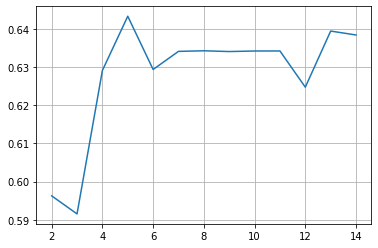

In [405]:
plt.plot(n, scores, label='CV Score')
plt.grid()
plt.show()